# Introduction to Quantum Circuits

## Imports

In [1]:
# Quantum Libraries
from qiskit import Aer, transpile, QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.circuit import Parameter
from qiskit.utils import algorithm_globals

# Standard Libraries
import numpy as np
from io import BytesIO
from PIL import Image

# Display and Math Libraries
from IPython.display import display, Latex
from sympy import Matrix, latex

## Constants and Setup

In [2]:
SEED = 42
simulator = Aer.get_backend("aer_simulator")

# Seed setup for reproducibility
simulator.set_options(seed_simulator=SEED)
algorithm_globals.random_seed = SEED
np.random.seed(SEED)

## Helper Functions

In [3]:
def random_angle():
    """Generate a random angle between -2π and 2π."""
    return np.random.uniform(-2 * np.pi, 2 * np.pi)


def plot_circuit(circuit: QuantumCircuit):
    state = Statevector.from_instruction(circuit)

    # Capture circuit plot
    circuit_img = BytesIO()
    fig1 = circuit.draw("mpl")
    fig1.savefig(circuit_img)
    circuit_img.seek(0)

    # Capture Bloch sphere plot
    bloch_img = BytesIO()
    fig2 = plot_bloch_multivector(state)
    fig2.savefig(bloch_img)
    bloch_img.seek(0)

    # Display side by side
    circuit_pil = Image.open(circuit_img)
    bloch_pil = Image.open(bloch_img)
    new_im = Image.new(
        "RGB",
        (
            circuit_pil.width + bloch_pil.width,
            max(circuit_pil.height, bloch_pil.height),
        ),
        (255, 255, 255),  # White background
    )
    new_im.paste(circuit_pil, (0, (bloch_pil.height - circuit_pil.height) // 2))
    new_im.paste(bloch_pil, (circuit_pil.width, 0))
    display(new_im)
    display(Latex(f"$${latex(Matrix(Operator(circuit)))}$$"))


def is_measured(circuit: QuantumCircuit) -> bool:
    for op, _, _ in circuit.data:
        if op.name == "measure":
            return True
    return False


def run_circuit(circuit: QuantumCircuit, simulator=simulator, **kwargs) -> dict:
    temp_circuit = circuit.copy()
    if not is_measured(temp_circuit):
        # Measure the circuit
        temp_circuit.measure_all()

    # Transpile for simulator
    circuit = transpile(temp_circuit, simulator)

    # Run and get counts
    result = simulator.run(temp_circuit, **kwargs).result()
    counts = result.get_counts(temp_circuit)
    display(plot_histogram(counts))

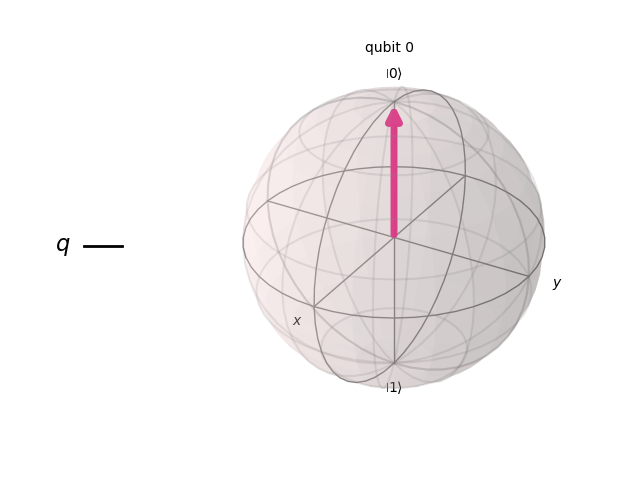

<IPython.core.display.Latex object>

In [4]:
circuit = QuantumCircuit(1)

plot_circuit(circuit)

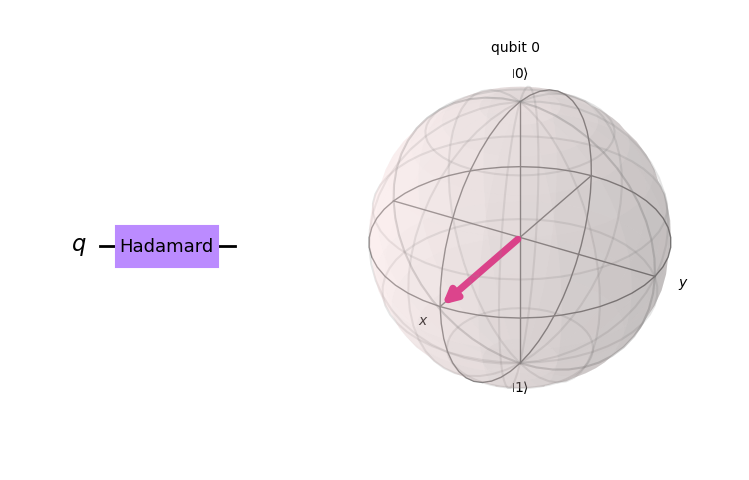

<IPython.core.display.Latex object>

In [5]:
h_op = Operator(np.array([[1, 1], [1, -1]]) / np.sqrt(2))

circuit.unitary(
    h_op, 0, label="Hadamard"
)  # Rotates state vector by π / 2 along the x-axis

plot_circuit(circuit)

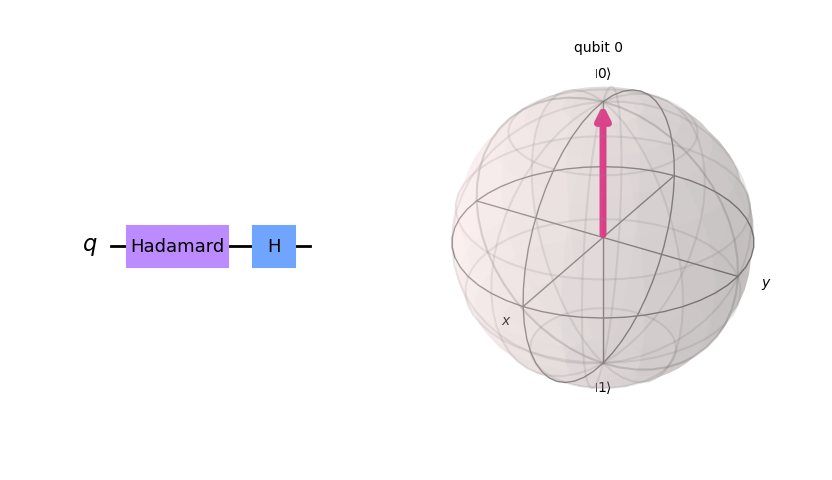

<IPython.core.display.Latex object>

In [6]:
# Quantum "gates" need to be reversible
circuit.h(0)

plot_circuit(circuit)

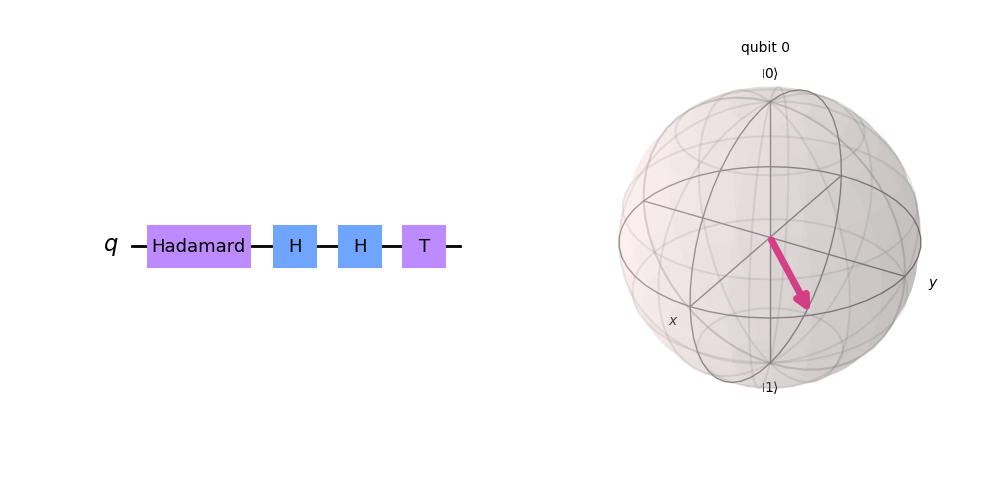

<IPython.core.display.Latex object>

In [7]:
circuit.h(0)
circuit.t(0)

plot_circuit(circuit)

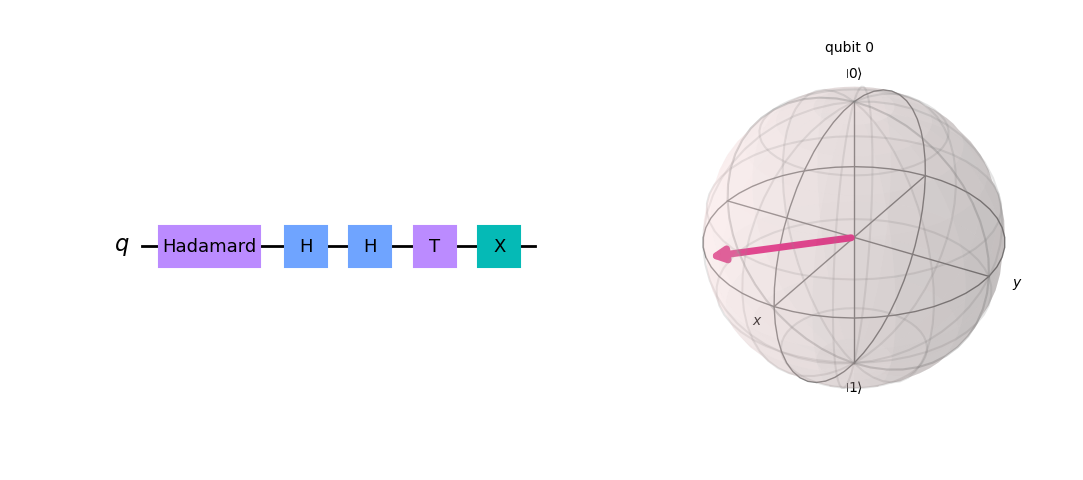

<IPython.core.display.Latex object>

In [8]:
circuit.x(0)

plot_circuit(circuit)

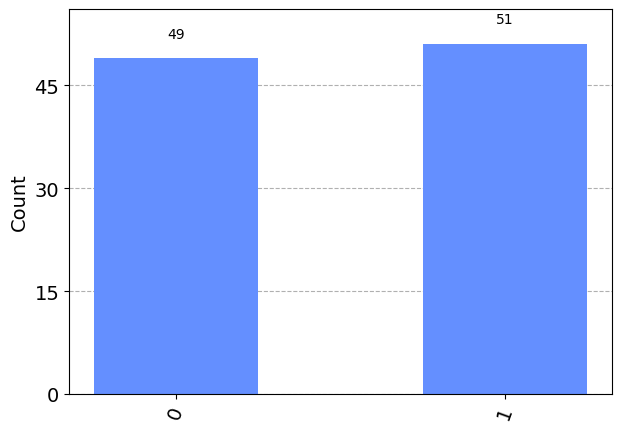

In [9]:
run_circuit(circuit, shots=100)

## Parameterized Circuits

In [10]:
# Constants
num_qubits = 3

phi = Parameter("φ")
theta = Parameter("θ")
psi = Parameter("ψ")

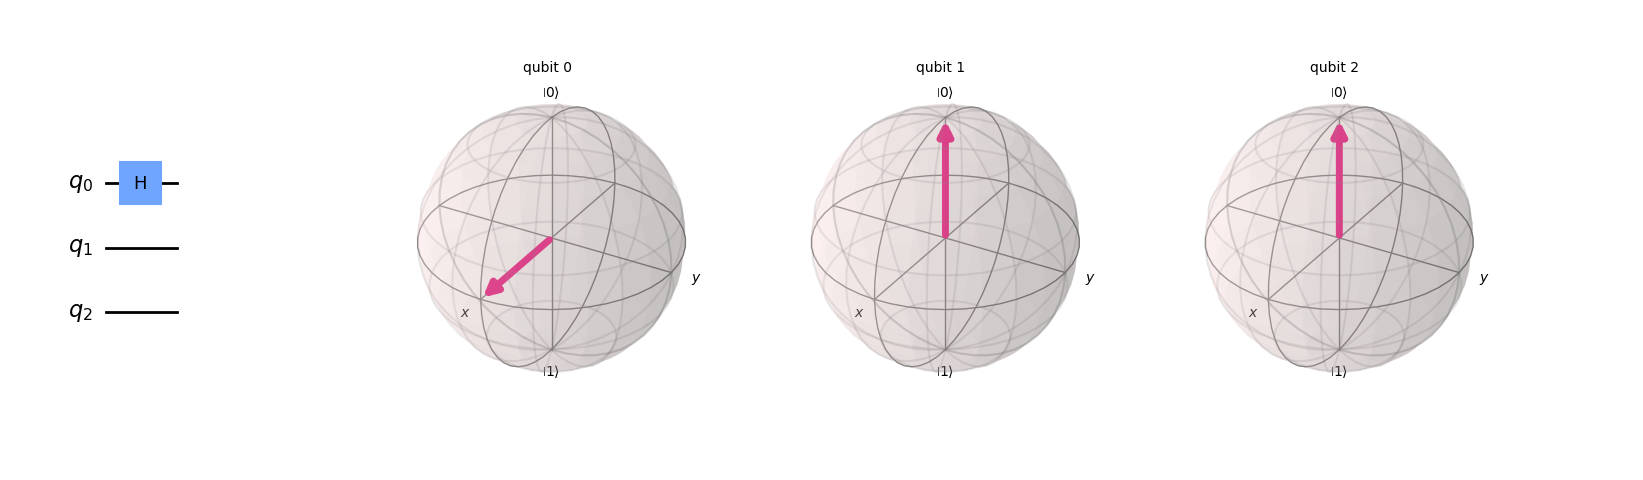

<IPython.core.display.Latex object>

In [11]:
parameterized_circuit = QuantumCircuit(num_qubits)

parameterized_circuit.h(0)

plot_circuit(parameterized_circuit)

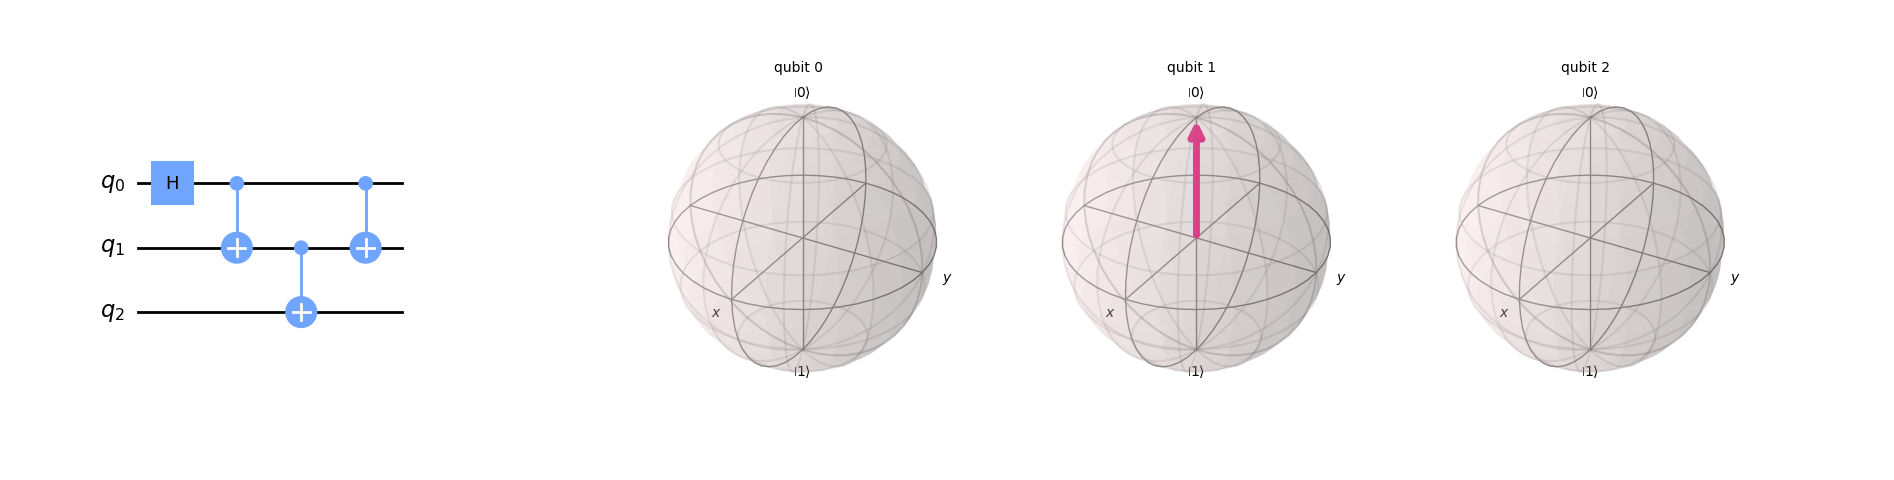

<IPython.core.display.Latex object>

In [12]:
parameterized_circuit.cx(0, 1)
parameterized_circuit.cx(1, 2)
parameterized_circuit.cx(0, 1)

plot_circuit(parameterized_circuit)

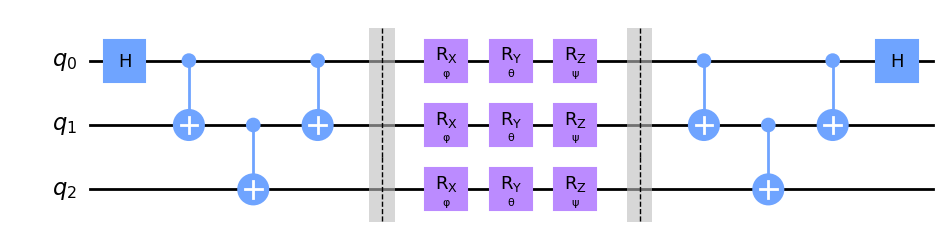

In [13]:
parameterized_circuit.barrier()

parameterized_circuit.rx(phi, range(num_qubits))
parameterized_circuit.ry(theta, range(num_qubits))
parameterized_circuit.rz(psi, range(num_qubits))

parameterized_circuit.barrier()

parameterized_circuit.cx(0, 1)
parameterized_circuit.cx(1, 2)
parameterized_circuit.cx(0, 1)

parameterized_circuit.h(0)

parameterized_circuit.draw("mpl")

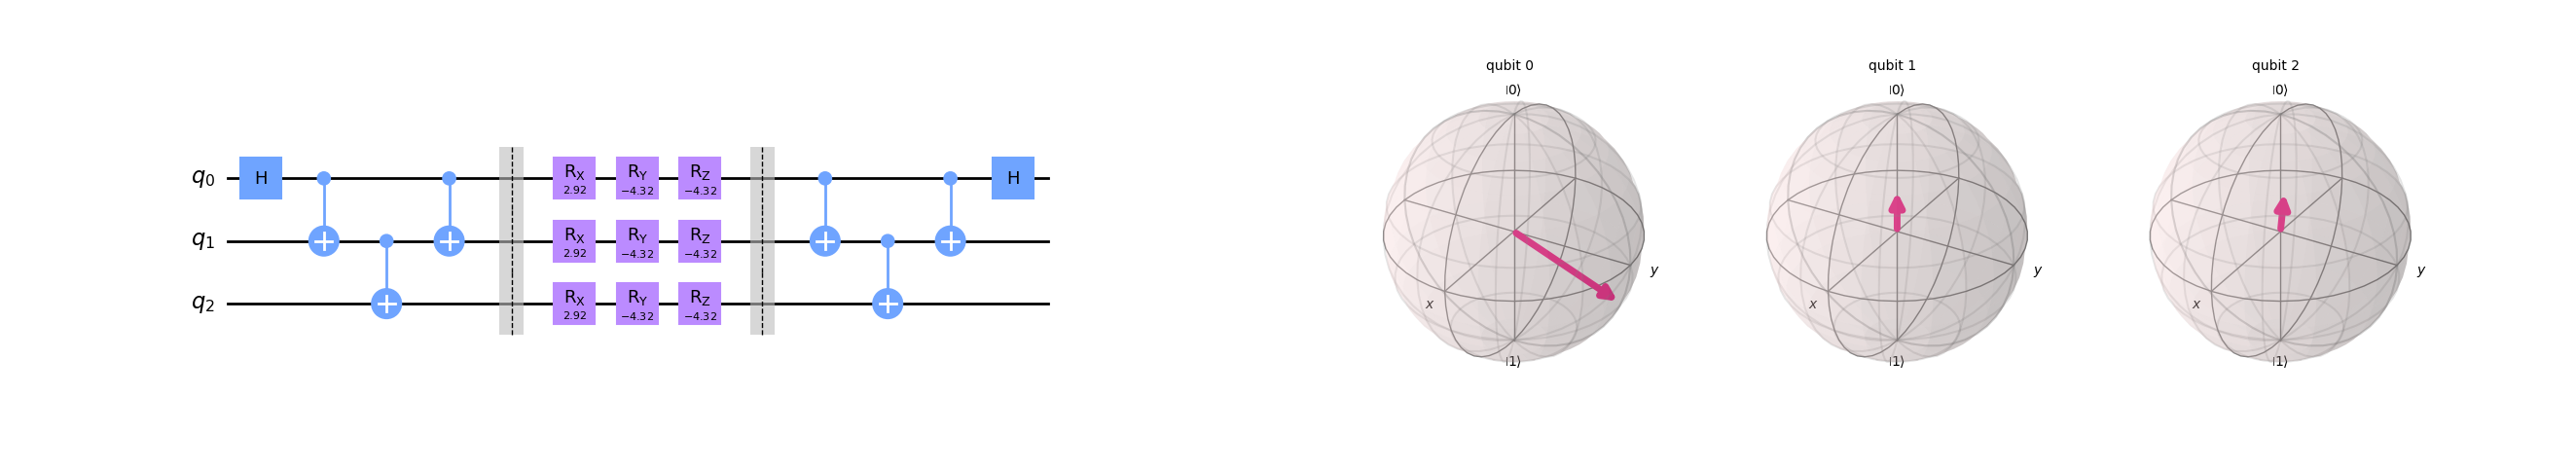

<IPython.core.display.Latex object>

In [14]:
parameterized_circuit.assign_parameters(
    {phi: random_angle() for _ in parameterized_circuit.parameters}, inplace=True
)
parameterized_circuit.assign_parameters(
    {theta: random_angle() for _ in parameterized_circuit.parameters}, inplace=True
)
parameterized_circuit.assign_parameters(
    {psi: random_angle() for _ in parameterized_circuit.parameters}, inplace=True
)
plot_circuit(parameterized_circuit)

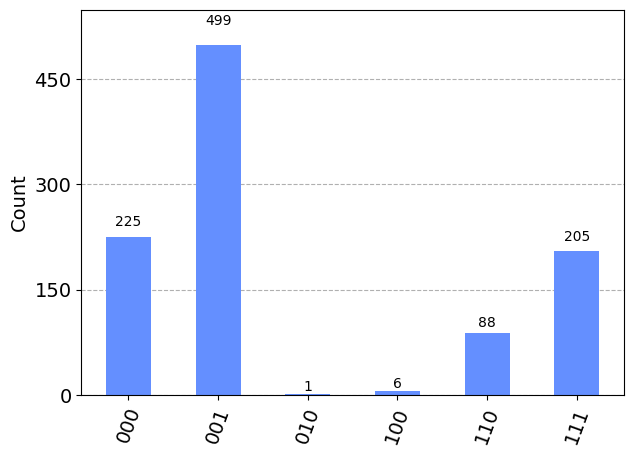

In [15]:
run_circuit(parameterized_circuit)